Predict selling car prices of used cars.

Model with Linear and Lasso Regression model.

Dataset Features:
    1. Car Brand
    2.Year
    3.Sold price
    4.Present Price
    5.KMS Driven
    6.Fuel type
    7.Seller type (individual or dealer)
    8.Transmission type ( automatic or manual)
    9.Owners
    

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [4]:
car_data= pd.read_csv('car data.csv')

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

In [6]:
car_data.head(5)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [7]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [8]:
car_data.shape

(301, 9)

In [13]:
car_data.dtypes

Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Kms_Driven         int64
Fuel_Type         object
Seller_Type       object
Transmission      object
Owner              int64
dtype: object

In [14]:
car_data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [16]:
print(car_data.Fuel_Type.value_counts())
print(car_data.Seller_Type.value_counts())
print(car_data.Transmission.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


In [17]:
#Encoding Categorical Data
car_data.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)

In [18]:
car_data.Fuel_Type

0      0
1      1
2      0
3      0
4      1
      ..
296    1
297    0
298    0
299    1
300    0
Name: Fuel_Type, Length: 301, dtype: int64

In [19]:
#Encoding Categorical Data
car_data.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)
#Encoding Categorical Data
car_data.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [20]:
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [21]:
X=car_data.drop(['Car_Name','Selling_Price'],axis=1)
Y=car_data['Selling_Price']

In [22]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.1,random_state=2)

In [23]:
lm=LinearRegression()

In [24]:
lm.fit(x_train,y_train)

LinearRegression()

In [26]:
pred=lm.predict(x_test)

In [28]:
error_score =metrics.r2_score(y_test,pred)

In [29]:
error_score

0.836576671502687

Text(0, 0.5, 'Prediced Price')

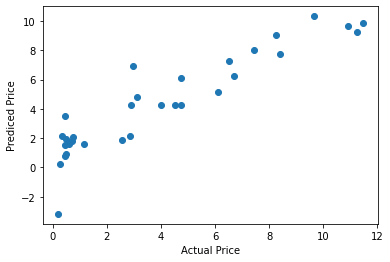

In [30]:
plt.scatter(y_test,pred)
plt.xlabel("Actual Price")
plt.ylabel("Prediced Price")
#the points predicted points are very close to actual points

In [31]:
np.sqrt(metrics.mean_squared_error(y_test,pred))

1.466332131198068

In [32]:
las=Lasso()

In [33]:
las.fit(x_train,y_train)

Lasso()

In [34]:
pred_las=las.predict(x_test)

In [37]:
error_score_las= metrics.r2_score(y_test,pred_las)

In [38]:
error_score_las

0.8709167941173195

In [39]:
np.sqrt(metrics.mean_squared_error(y_test,pred_las))

1.3031973759552113

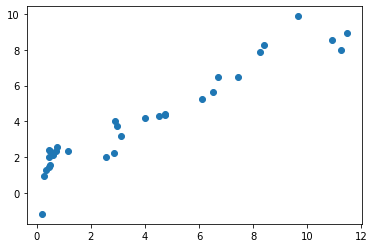

In [40]:
plt.scatter(y_test,pred_las)

In [ ]:
#scatter plot lasso Regression is more closer than Linear Regression Model 
Root mean sqaured error value was also less for Lasso comapred to Linear R

In [46]:
x_test['predicted_values']=pred

In [49]:
x_test

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,predicted_values
99,2010,20.450,50024,1,0,0,0,10.328929
161,2014,0.826,23000,0,1,0,0,0.771657
89,2014,6.760,40000,0,0,0,0,4.264823
30,2012,5.980,51439,1,0,0,0,4.789850
232,2015,14.790,12900,0,0,1,0,9.887016
290,2014,6.400,19000,0,0,0,0,4.248232
35,2011,7.740,49998,2,0,0,0,6.925370
7,2015,8.610,33429,1,0,0,0,7.293211
183,2013,0.470,21000,0,1,0,0,0.219505
13,2015,7.710,26000,0,0,0,0,5.185276


In [ ]:
#from year we can derive new feature for number of years
set current_year =2023
then subtact oldyearcolumn-current year 
dropped the old year column


In [ ]:
#dropping features like car_name which is not useful

In [ ]:
#applying get_dummies on categorical data
encoding categorical data into 1,0 encoding.
dummy variable encoding using get_dummies
Because Regression model doesnt take categorical data 
only deals with numeric input and output.
Here we have petrol desiel and CNG we did drop first and dropped cng

Heatmap is used to check for highly correlated variables and we can drop them

In [57]:

car_data1= pd.read_csv('car data.csv')

In [58]:
car_data1.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [62]:
car_data1.drop('Car_Name',axis=1,inplace=True)

In [64]:
pd.get_dummies(car_data1,drop_first=True)

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,2014,3.35,5.59,27000,0,0,1,0,1
1,2013,4.75,9.54,43000,0,1,0,0,1
2,2017,7.25,9.85,6900,0,0,1,0,1
3,2011,2.85,4.15,5200,0,0,1,0,1
4,2014,4.60,6.87,42450,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,0,1,0,0,1
297,2015,4.00,5.90,60000,0,0,1,0,1
298,2009,3.35,11.00,87934,0,0,1,0,1
299,2017,11.50,12.50,9000,0,1,0,0,1


C:\Users\deepa_atj5xcu\.conda\envs\Deepa_python\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

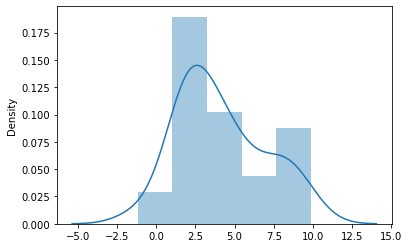

In [65]:
sns.distplot(pred_las)

In [ ]:
normal distribution therefore good predictions

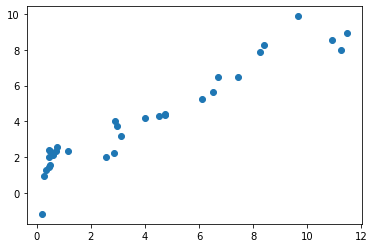

In [67]:
plt.scatter(y_test,pred_las)

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Car_Name_800,Car_Name_Activa 3g,...,Car_Name_land cruiser,Car_Name_omni,Car_Name_ritz,Car_Name_s cross,Car_Name_swift,Car_Name_sx4,Car_Name_verna,Car_Name_vitara brezza,Car_Name_wagon r,Car_Name_xcent
0,2014,3.35,5.59,27000,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,2013,4.75,9.54,43000,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,2017,7.25,9.85,6900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2011,2.85,4.15,5200,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,2014,4.60,6.87,42450,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
297,2015,4.00,5.90,60000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
298,2009,3.35,11.00,87934,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
299,2017,11.50,12.50,9000,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
